In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loading data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train, X_test = np.expand_dims(X_train, -1), np.expand_dims(X_test, -1)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [6]:
X_train.max(), X_test.max()

(255, 255)

In [7]:
X_train, X_test = X_train / 255., X_test / 255.

In [8]:
X_train.max(), X_test.max()

(1.0, 1.0)

## Creating the model

In [9]:
i = tf.keras.layers.Input(X_train[0].shape)

x = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(i)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(32, (3, 3), padding="same")(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.MaxPool2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(10, activation="softplus")(x)

In [10]:
model = tf.keras.Model(i, x)

In [11]:
model.compile(
    "adam",
    tf.keras.losses.sparse_categorical_crossentropy,
    metrics="accuracy"
)

In [12]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 15s 5ms/step - loss: 0.2075 - accuracy: 0.9361 - val_loss: 0.0976 - val_accuracy: 0.9714
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0785 - accuracy: 0.9762 - val_loss: 0.1101 - val_accuracy: 0.9698
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0582 - accuracy: 0.9829 - val_loss: 0.0809 - val_accuracy: 0.9740
Epoch 4/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0682 - val_accuracy: 0.9811
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0392 - accuracy: 0.9877 - val_loss: 0.0769 - val_accuracy: 0.9793
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0846 - val_accuracy: 0.9790
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.0726 - val_accuracy

## Evaluate

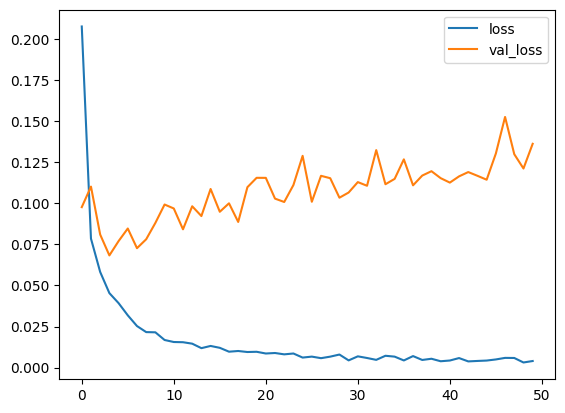

In [13]:
pd.DataFrame(r.history)[["loss", "val_loss"]].plot();

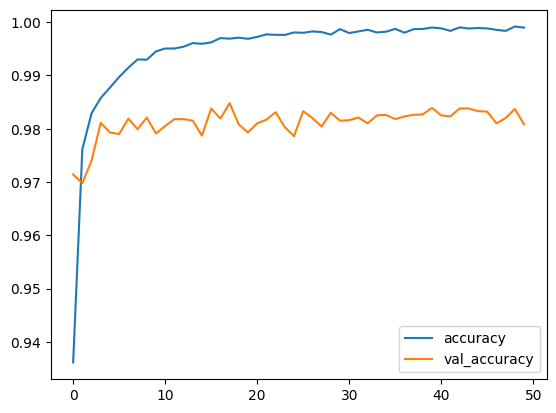

In [14]:
pd.DataFrame(r.history)[["accuracy", "val_accuracy"]].plot();

## Check where model misses

In [15]:
y_test_preds = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 2ms/step


In [16]:
errors_idx = y_test != y_test_preds

In [17]:
sum(~errors_idx)/len(y_test)

0.9808

In [18]:
errors_idx = np.where(errors_idx)[0]

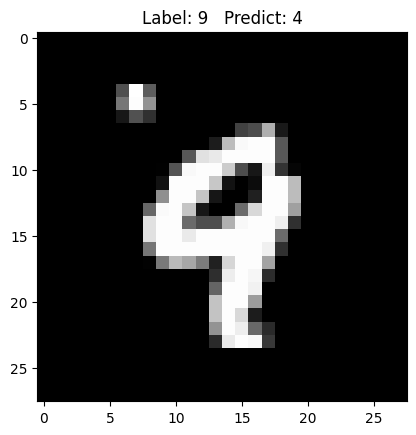

In [19]:
idx = np.random.choice(errors_idx)

plt.imshow(X_test[idx], cmap="gray");
plt.title(f"Label: {y_test[idx]}   Predict: {y_test_preds[idx]}");

In [20]:
model.save("../artifacts/model.h5")

/home/italocosilva/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
